# Spark Funds Investment Analysis

In [1]:
#### Investment Analysis

#import pandas, numpyn matplotlib, seaborn, datetime, regular expressions 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

#upload csv files companies and round2

# cleanup the data in companies and check points in 1.1 Table 

# cleanup the data in round2 and check the points in 1.1 Table

#merge both the dataframes to master_list and need to work on this master list 


## Checkpoint 1: Data Cleaning



In [2]:
#setting up paths and file
path = "C:/Users/Sudhakar/Desktop/Python/Week5_Invenstment Analysis/"

company_file = path+"companies.csv"

round2_file = path+"rounds2.csv"

mapper_file = path+"mapping.csv"


## Upload companies csv file and clean data 

In [3]:
#upload csv files companies 

companies = pd.read_csv(company_file ,sep=',', encoding='iso-8859-1', engine='python')

# Convert permalink data to lower case to make easy for merging

companies['permalink'] = companies['permalink'].str.lower()

pd.unique(companies.permalink)

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ...,
       '/organization/ã\x81eron', '/organization/ã\x94asys-2',
       '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic'],
      dtype=object)

In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/organization/priceonomics,#NAME?,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [6]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [7]:
# Drop unwanted columns with more null values

companies = companies.drop(['founded_at'], axis = 1) 
companies = companies.drop(['city'], axis=1)
companies = companies.drop(['state_code'], axis=1)
companies = companies.drop(['region'], axis=1)
companies = companies.drop(['homepage_url'], axis=1)

companies.head()

,permalink,name,category_list,status,country_code
0,/organization/-fame,#fame,Media,operating,IND
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
3,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
4,/organization/004-technologies,004 Technologies,Software,operating,USA


In [8]:
#cleaning permalink and name fields for ascii characters 

companies['permalink'] = companies[['permalink']].applymap(lambda x:x.encode('utf-8').decode('ascii','ignore'))
companies['name'] = companies['name'].str.encode('utf-8').str.decode('ascii','ignore')


pd.unique(companies.permalink)

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ..., '/organization/eron',
       '/organization/asys-2',
       '/organization/novatiff-reklam-ve-tantm-hizmetleri-tic'],
      dtype=object)

## Upload round2 csv and cleaning :

In [9]:
#upload csv files  round2
round2 = pd.read_csv(round2_file ,sep=',', encoding='unicode_escape')

#differnce in permalink before conversion 
df_diff = pd.concat([round2.company_permalink,companies.permalink]).drop_duplicates(keep=False)
df_diff.head()

1                  /ORGANIZATION/-QOUNTER
3     /ORGANIZATION/-THE-ONE-OF-THEM-INC-
5          /ORGANIZATION/004-TECHNOLOGIES
7     /ORGANIZATION/0NDINE-BIOMEDICAL-INC
17                  /ORGANIZATION/1-4-ALL
dtype: object

In [10]:
## cleaning round2_df data 
## ignoring ascii characters in company_permalink and funding_round_type columns 

round2['company_permalink'] = round2[['company_permalink']].applymap(lambda x:x.encode('utf-8').decode('ascii','ignore'))
round2['funding_round_type'] = round2['funding_round_type'].str.encode('utf-8').str.decode('ascii','ignore')

#converting to lower case for making easy for merging
round2['company_permalink'] = round2['company_permalink'].str.lower()

round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [11]:
# round2 describe to chec the unique companies
round2.describe(include=['object'])

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at
count,114949,114949,114949,31140,114949
unique,66368,114949,14,8,5033
top,/organization/solarflare,/funding-round/3616e2d91de89863f3a7c9722cb363d7,venture,A,01-01-2014
freq,19,1,55494,14747,779


In [12]:
pd.unique(round2.company_permalink)

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ..., '/organization/eron',
       '/organization/asys-2',
       '/organization/novatiff-reklam-ve-tantm-hizmetleri-tic'],
      dtype=object)

In [13]:
round2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [14]:
companies.columns

Index(['permalink', 'name', 'category_list', 'status', 'country_code'], dtype='object')

In [15]:
#Observed no difference after conversion to lower and removing special characters in both dataframes 
df_diff = pd.concat([round2.company_permalink,companies.permalink]).drop_duplicates(keep=False)
df_diff.head()

Series([], dtype: object)

## Merge Companies and Round dataframes 

In [16]:
#merged both dataframes to master dataframe using left join 
master_frame_df = pd.merge(left=round2,right=companies, how='left',left_on='company_permalink', right_on='permalink')

master_frame_df.shape

round(100*(master_frame_df.isnull().sum()/len(master_frame_df.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
dtype: float64

In [17]:
master_frame_df.head(100)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
...,...,...,...,...,...,...,...,...,...,...,...
95,/organization/1234enter,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,NaN,22-11-2013,150267.0,/organization/1234enter,1234ENTER,Advertising|Analytics|Business Services|E-Comm...,operating,NaN
96,/organization/1234enter,/funding-round/ee6f9dea78c9a0697a500098a854564d,seed,NaN,01-09-2012,500000.0,/organization/1234enter,1234ENTER,Advertising|Analytics|Business Services|E-Comm...,operating,NaN
97,/organization/123contactform,/funding-round/af7382f8e3d806986796029388cb1b7f,venture,NaN,16-06-2015,1000000.0,/organization/123contactform,123ContactForm,E-Commerce|SaaS,operating,ROM
98,/organization/123contactform,/funding-round/b678dec4e0df10e2518a81215f8fd843,angel,NaN,01-01-2010,NaN,/organization/123contactform,123ContactForm,E-Commerce|SaaS,operating,ROM


In [18]:
master_df_sorted = master_frame_df.sort_values(by='company_permalink')
master_df_sorted.shape

(114949, 11)

In [19]:
#No null values in fund_round_type
master_df_sorted.funding_round_type.isnull().sum()


0

In [20]:
#check funding_round_type counts 
master_df_sorted.funding_round_type.value_counts()


venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [21]:
#check company_permalink counts 
master_df_sorted.company_permalink.value_counts()

/organization/solarflare               19
/organization/exagen-diagnostics       18
/organization/semprius                 18
/organization/quellan                  18
/organization/endogastric-solutions    17
                                       ..
/organization/abzorba-games             1
/organization/3ci                       1
/organization/project-wbs               1
/organization/maximus                   1
/organization/ofidium                   1
Name: company_permalink, Length: 66368, dtype: int64

In [22]:
#get summary of the columns 
master_df_sorted.describe(include=['object'])

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,permalink,name,category_list,status,country_code
count,114949,114949,114949,31140,114949,114949,114948,111539,114949,106271
unique,66368,114949,14,8,5033,66368,66099,27296,4,137
top,/organization/solarflare,/funding-round/3616e2d91de89863f3a7c9722cb363d7,venture,A,01-01-2014,/organization/solarflare,Solarflare Communications,Biotechnology,operating,USA
freq,19,1,55494,14747,779,19,19,8165,90153,72308


In [23]:
master_df_sorted.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
permalink                   object
name                        object
category_list               object
status                      object
country_code                object
dtype: object

In [24]:
######Data Cleaning Process

In [25]:
master_df_sorted.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
permalink                   object
name                        object
category_list               object
status                      object
country_code                object
dtype: object

In [26]:
master_df_sorted['raised_amount_usd_millions'] = pd.to_numeric(master_df_sorted.raised_amount_usd, errors='coerce')/1e6

In [27]:
master_df_sorted.raised_amount_usd_millions.describe()

count    94959.000000
mean        10.426869
std        114.821248
min          0.000000
25%          0.322500
50%          1.680511
75%          7.000000
max      21271.935000
Name: raised_amount_usd_millions, dtype: float64

In [28]:
master_df_sorted.raised_amount_usd_millions.isnull().sum()

19990

In [29]:
#remove null and 0 values from raised_amount_usd
master_df_sorted = master_df_sorted[~master_df_sorted['raised_amount_usd_millions'].isnull()]
master_df_sorted.drop(master_df_sorted[master_df_sorted.raised_amount_usd_millions <=0].index, inplace=True)

master_df_sorted.shape

(94544, 12)

In [30]:
#removing null from country code 
master_df_sorted.country_code.isnull().sum()
master_df_sorted = master_df_sorted[~master_df_sorted['country_code'].isnull()]
master_df_sorted.shape
#master_df_sorted.country_code.isnull().sum()

(88729, 12)

In [31]:
master_df_sorted.raised_amount_usd_millions.value_counts()

1.000000      2714
2.000000      2127
0.500000      1999
5.000000      1964
10.000000     1959
              ... 
0.236484         1
0.464876         1
850.000000       1
10.625000        1
0.040005         1
Name: raised_amount_usd_millions, Length: 20779, dtype: int64

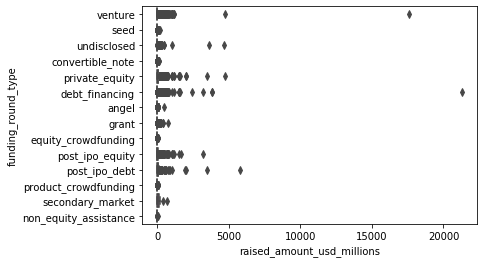

In [32]:
sns.boxplot(y=master_df_sorted.funding_round_type,x=master_df_sorted.raised_amount_usd_millions)
plt.show()

## Checkpoint 2: Funding Type Analysis

In [33]:
# Check Point 2
fundtype_segment = master_df_sorted.funding_round_type.value_counts()
fundtype_segment

venture                  48084
seed                     21158
debt_financing            6510
angel                     4400
grant                     1977
private_equity            1834
undisclosed               1337
convertible_note          1303
equity_crowdfunding        956
post_ipo_equity            601
product_crowdfunding       329
post_ipo_debt              151
non_equity_assistance       60
secondary_market            29
Name: funding_round_type, dtype: int64

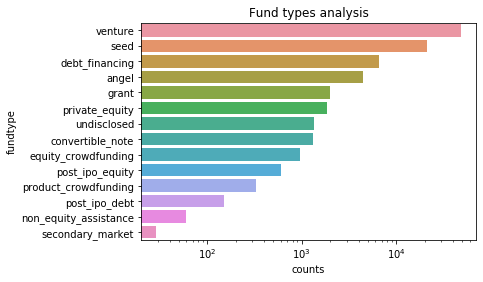

In [34]:
#plotting all ventures based on counts, using log scale for better projections 

fundtype_vc_df = pd.DataFrame({'fundtype':fundtype_segment.index,'counts':fundtype_segment.values})

fundtype_plot = sns.barplot(x="counts", y="fundtype",  data=fundtype_vc_df)
fundtype_plot.set_title("Fund types analysis")
fundtype_plot.set(xscale="log")
plt.show()

In [35]:
master_df_sorted.raised_amount_usd_millions.sort_values().value_counts()

1.000000     2714
2.000000     2127
0.500000     1999
5.000000     1964
10.000000    1959
             ... 
0.145252        1
0.227423        1
0.602917        1
0.236484        1
26.121384       1
Name: raised_amount_usd_millions, Length: 20779, dtype: int64

In [36]:
# Four investment types

print(master_df_sorted[master_df_sorted.funding_round_type=="angel"].raised_amount_usd_millions.mean())
print(master_df_sorted[master_df_sorted.funding_round_type=="seed"].raised_amount_usd_millions.mean())
print(master_df_sorted[master_df_sorted.funding_round_type=="venture"].raised_amount_usd_millions.mean())
print(master_df_sorted[master_df_sorted.funding_round_type=="private_equity"].raised_amount_usd_millions.mean())

0.9745033454545458
0.7507563479535142
11.742369779177917
73.65870460087243


In [37]:
master_df_sorted.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,raised_amount_usd_millions
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,10.00000
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,0.70000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,2.00000
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,Games,operating,HKG,0.04125
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,0.04336


In [38]:
master_df_sorted.raised_amount_usd_millions.describe()

count    88729.000000
mean        10.515320
std        111.696308
min          0.000001
25%          0.383850
50%          1.842105
75%          7.200000
max      21271.935000
Name: raised_amount_usd_millions, dtype: float64

## Check Point 3 : Country Analysis


In [39]:
# Considering Spark Funds wants to invest between 5 to 15 millions USD 

master_df_sorted = master_df_sorted.loc[(master_df_sorted.raised_amount_usd_millions>=5.0) & (master_df_sorted.raised_amount_usd_millions<=15.0)]


In [40]:
#filter venture and group by country code
country_grouped_e =master_df_sorted.loc[master_df_sorted.funding_round_type=='venture'].reset_index().groupby(['country_code'])
country_grouped_e.head(1000)

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,raised_amount_usd_millions
0,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,10.000000
1,12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,8.900000
2,22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,5.000000
3,46,/organization/1001-menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.0,/organization/1001-menus,ZenChef,Local Businesses|Restaurants,operating,FRA,6.602694
4,50,/organization/1001pharmacies-com,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,8900000.0,/organization/1001pharmacies-com,1001pharmacies.com,Cosmetics|Marketplaces,operating,FRA,8.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15882,114889,/organization/zymeworks,/funding-round/917b2ed7b99f219fcbc660c9789482d5,venture,D,22-09-2011,8100000.0,/organization/zymeworks,Zymeworks,Biotechnology,operating,CAN,8.100000
15883,114891,/organization/zymeworks,/funding-round/d7b019f508ef724ca3a851a4359a272f,venture,NaN,06-09-2012,11000000.0,/organization/zymeworks,Zymeworks,Biotechnology,operating,CAN,11.000000
15884,114892,/organization/zymeworks,/funding-round/e4dee9b0a5fa30e650e5dea33e1faad8,venture,NaN,09-01-2014,15000000.0,/organization/zymeworks,Zymeworks,Biotechnology,operating,CAN,15.000000
15890,114916,/organization/zynstra,/funding-round/05f43b37c270f5919578281ce803de8f,venture,B,09-07-2014,8400000.0,/organization/zynstra,Zynstra,Software,operating,GBR,8.400000


In [41]:
#Top 9 contry for venture funding 

country_top9_segment = country_grouped_e.raised_amount_usd_millions.sum().sort_values(ascending=False).head(9)


country_top9_df = pd.DataFrame({'country':country_top9_segment.index,'Amount_raised_usd_mil':country_top9_segment.values})


country_top9_df




,country,Amount_raised_usd_mil
0,USA,108531.347515
1,GBR,5436.843539
2,CHN,5016.561053
3,CAN,3647.009578
4,IND,2976.543602
5,ISR,2840.305951
6,FRA,2112.425453
7,DEU,1765.026223
8,SWE,655.040681


## Checkpoint 4 : Sector Analysis

In [42]:
#upload mapping.csv file 

mapping_df = pd.read_csv(mapper_file, sep=',', engine='python')

In [43]:
# Drop null values and lower case category_list for cleaning

mapping_df = mapping_df.dropna()
mapping_df['category_list'] = mapping_df.category_list.apply(lambda category_name: str(category_name).lower())

In [44]:
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [45]:
mapping_df.category_list.value_counts()


0tural resources           1
green                      1
android                    1
mhealth                    1
communications hardware    1
                          ..
human resources            1
recreation                 1
fitness                    1
billing                    1
enterprise 2.0             1
Name: category_list, Length: 687, dtype: int64

In [46]:

mapping_df.dtypes


category_list                              object
Automotive & Sports                         int64
Blanks                                      int64
Cleantech / Semiconductors                  int64
Entertainment                               int64
Health                                      int64
Manufacturing                               int64
News, Search and Messaging                  int64
Others                                      int64
Social, Finance, Analytics, Advertising     int64
dtype: object

In [47]:
master_df_sorted.shape

(18037, 12)

In [48]:


mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [49]:
x = mapping_df.iloc[:,1:]
x

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
683,0,0,0,0,0,0,0,1,0
684,0,0,0,1,0,0,0,0,0
685,0,0,0,1,0,0,0,0,0
686,0,0,0,0,0,0,0,1,0


In [50]:
x = x.idxmax(axis=1)


In [51]:
#creating sector dataframe from mapping dataframe and add a column in mapping_df

sector_df = pd.DataFrame(x)
sector_df.head()
mapping_df['main_sector'] = sector_df[0]
mapping_df.head()
master_df_sorted.shape
sector_df

,0
1,Manufacturing
2,Manufacturing
3,Manufacturing
4,"Social, Finance, Analytics, Advertising"
5,Health
...,...
683,Others
684,Entertainment
685,Entertainment
686,Others


In [52]:
#remove null values
mapping_df.dropna()
mapping_df = mapping_df.drop(['Automotive & Sports','Blanks','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'], axis = 1) 


In [53]:
mapping_df['category_list'] = mapping_df.category_list.apply(lambda cat_list: re.sub('[0]', 'na', cat_list))

In [54]:
#Extract the primary sector of each category list from the category_list column
master_df_sorted['primary_sector'] = master_df_sorted["category_list"].str.split("|", n = 1, expand = True)[0]

master_df_sorted['primary_sector'] = master_df_sorted.primary_sector.apply(lambda x: str(x).lower())

master_df_sorted.primary_sector.value_counts()


biotechnology          2270
software               1428
advertising             895
enterprise software     802
health care             693
                       ... 
governance                1
mobile health             1
mhealth                   1
civil engineers           1
educational games         1
Name: primary_sector, Length: 489, dtype: int64

In [55]:
#Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors 
master_df_sorted.head()
master_df_sector = pd.merge(left=master_df_sorted,right=mapping_df, how='inner',left_on='primary_sector', right_on='category_list')
master_df_sector = master_df_sector.drop(['category_list_y'], axis = 1) 
master_df_sector.head()
#master_df_sorted.shape

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,raised_amount_usd_millions,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,10.000000,media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,15.000000,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,5.800000,media,Entertainment
3,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,Media,operating,USA,5.000000,media,Entertainment
4,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,NaN,07-01-2002,13439178.0,/organization/basel-switzerland,The Speedel Group,Media,closed,CHE,13.439178,media,Entertainment


In [56]:
master_df_sector.main_sector.value_counts()

Others                                     4299
Social, Finance, Analytics, Advertising    3793
Cleantech / Semiconductors                 3673
News, Search and Messaging                 2262
Health                                     1379
Manufacturing                              1205
Entertainment                               988
Automotive & Sports                         285
Name: main_sector, dtype: int64

# Checkpoint 5: Sector Analysis 2

In [57]:
# create 3 Dataframes D1, D2, D3 
# 1. Fund type venture and Fund range 5-15 M and for country USA 
# 2. Fund type venture and Fund range 5-15 M and for country GBR 
# 3. Fund type venture and Fund range 5-15 M and for country IND 

In [58]:
#
master_df_sector = master_df_sector.loc[master_df_sector.funding_round_type=='venture']

master_df_sector.shape

(15770, 14)

In [59]:
master_df_sector = master_df_sector.loc[(master_df_sector.country_code=='CAN') | (master_df_sector.country_code=='USA') | (master_df_sector.country_code=='GBR')]

master_df_sector.shape

(13106, 14)

In [60]:
master_df_sector.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,raised_amount_usd_millions,primary_sector,main_sector
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,15.0,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,5.8,media,Entertainment
3,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,Media,operating,USA,5.0,media,Entertainment
5,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,/organization/chefs-feed,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,5.0,media,Entertainment
6,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,5.0,media,Entertainment


In [61]:
master_df_sector.main_sector.isnull().sum()

0

In [62]:
master_df_sector.raised_amount_usd_millions.value_counts()

10.000000    1336
5.000000     1325
15.000000     871
6.000000      788
8.000000      710
             ... 
5.299830        1
5.692656        1
12.550006       1
6.309744        1
5.095630        1
Name: raised_amount_usd_millions, Length: 2061, dtype: int64

In [63]:
master_df_sector.main_sector.value_counts()

Others                                     3206
Social, Finance, Analytics, Advertising    2925
Cleantech / Semiconductors                 2592
News, Search and Messaging                 1702
Health                                      954
Manufacturing                               872
Entertainment                               670
Automotive & Sports                         185
Name: main_sector, dtype: int64

In [64]:
master_df_sector.raised_amount_usd_millions.describe()


count    13106.000000
mean         8.907025
std          3.061469
min          5.000000
25%          6.000005
50%          8.250000
75%         11.000000
max         15.000000
Name: raised_amount_usd_millions, dtype: float64

In [65]:
# Creating Dataframe for country USA
D1 = master_df_sector.loc[master_df_sector.country_code=='USA']

D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,raised_amount_usd_millions,primary_sector,main_sector
3,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,Media,operating,USA,5.0,media,Entertainment
5,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,/organization/chefs-feed,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,5.0,media,Entertainment
6,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,5.0,media,Entertainment
7,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,5.0,media,Entertainment
8,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,/organization/matchmine,MatchMine,Media|News|Reviews and Recommendations,closed,USA,10.0,media,Entertainment


In [66]:
# Creating Dataframe for country GBR
D2 = master_df_sector.loc[master_df_sector.country_code=='GBR']

D2.shape

(621, 14)

In [67]:
# Creating Dataframe for country CAN
D3 = master_df_sector.loc[master_df_sector.country_code=='CAN']

D3.shape

(422, 14)

In [68]:
#Creatingmain_sector based lists
sector_list_d1_df = D1.main_sector.value_counts().sort_values(ascending=False)
sector_list_d2_df = D2.main_sector.value_counts().sort_values(ascending=False)
sector_list_d3_df = D3.main_sector.value_counts().sort_values(ascending=False)


In [69]:
sector_list_d3_df

Cleantech / Semiconductors                 112
Others                                     109
Social, Finance, Analytics, Advertising     78
News, Search and Messaging                  46
Manufacturing                               31
Entertainment                               23
Health                                      21
Automotive & Sports                          2
Name: main_sector, dtype: int64

In [70]:
#Create temp sector dataframe for analysis
sector_temp_df = master_df_sector.main_sector.value_counts().sort_values(ascending=False)

In [71]:
#Adding 2 coulmns  investment count and total investment for temp summary df, it will be combination of all 3 countries

temp_Summary_df = pd.DataFrame()
temp_Summary_df['main_sector'] = sector_temp_df.index
temp_Summary_df['investment_count'] = sector_temp_df.values
temp_Summary_df.head(8)

temp_sector_segment = master_df_sector.groupby('main_sector')['raised_amount_usd_millions'].sum()
temp_total_df = pd.DataFrame()
temp_total_df['main_sector'] = temp_sector_segment.index
temp_total_df['total_investment'] = temp_sector_segment.values

temp_Summary_df = pd.merge(temp_Summary_df, temp_total_df, how='inner', left_on='main_sector', right_on='main_sector')
temp_Summary_df.total_investment = temp_Summary_df.total_investment.astype(float)
temp_Summary_df

,main_sector,investment_count,total_investment
0,Others,3206,28530.769253
1,"Social, Finance, Analytics, Advertising",2925,25552.924053
2,Cleantech / Semiconductors,2592,23813.308485
3,"News, Search and Messaging",1702,15007.434776
4,Health,954,8594.741931
5,Manufacturing,872,7858.126784
6,Entertainment,670,5742.004737
7,Automotive & Sports,185,1636.155926


In [72]:
temp_Summary_df.total_investment.sum()

116735.46594499992

In [73]:
temp_Summary_df.investment_count.sum()

13106

In [74]:
#Adding 2 coulmns  investment count and total investment for D1 table
D1_Summary_df = pd.DataFrame()
D1_Summary_df['main_sector'] = sector_list_d1_df.index
D1_Summary_df['investment_count'] = sector_list_d1_df.values
D1_Summary_df.head(8)

sector_segment_d1 = D1.groupby('main_sector')['raised_amount_usd_millions'].sum()
D1_total_df = pd.DataFrame()
D1_total_df['main_sector'] = sector_segment_d1.index
D1_total_df['total_investment'] = sector_segment_d1.values

D1_Summary_df = pd.merge(D1_Summary_df, D1_total_df, how='inner', left_on='main_sector', right_on='main_sector')
D1_Summary_df.total_investment = D1_Summary_df.total_investment.astype(float)

D1_Summary_df

,main_sector,investment_count,total_investment
0,Others,2950,26321.007002
1,"Social, Finance, Analytics, Advertising",2714,23807.376964
2,Cleantech / Semiconductors,2350,21633.430822
3,"News, Search and Messaging",1583,13971.567428
4,Health,909,8211.859357
5,Manufacturing,799,7258.553378
6,Entertainment,591,5099.197982
7,Automotive & Sports,167,1454.104361


In [75]:
D1_Summary_df.total_investment.sum()

107757.09729399992

In [76]:
#Adding 2 coulmns  investment count and total investment for D2 table
D2_Summary_df = pd.DataFrame()
D2_Summary_df['main_sector'] = sector_list_d2_df.index
D2_Summary_df['investment_count'] = sector_list_d2_df.values
D2_Summary_df.head(8)

sector_segment_d2 = D2.groupby('main_sector')['raised_amount_usd_millions'].sum()
D2_total_df = pd.DataFrame()
D2_total_df['main_sector'] = sector_segment_d2.index
D2_total_df['total_investment'] = sector_segment_d2.values

D2_Summary_df = pd.merge(D2_Summary_df, D2_total_df, how='inner', left_on='main_sector', right_on='main_sector')
D2_Summary_df.total_investment = D2_Summary_df.total_investment.astype(float)

D2_Summary_df

,main_sector,investment_count,total_investment
0,Others,147,1283.624289
1,"Social, Finance, Analytics, Advertising",133,1089.404014
2,Cleantech / Semiconductors,130,1163.990056
3,"News, Search and Messaging",73,615.746235
4,Entertainment,56,482.784687
5,Manufacturing,42,361.940335
6,Health,24,214.537510
7,Automotive & Sports,16,167.051565


In [77]:
D2_Summary_df.total_investment.sum()

5379.078691000001

In [78]:
#Adding 2 coulmns  investment count and total investment for D3 table 
D3_Summary_df = pd.DataFrame()
D3_Summary_df['main_sector'] = sector_list_d3_df.index
D3_Summary_df['investment_count'] = sector_list_d3_df.values
D3_Summary_df.head(8)

sector_segment_d3 = D3.groupby('main_sector')['raised_amount_usd_millions'].sum()
D3_total_df = pd.DataFrame()
D3_total_df['main_sector'] = sector_segment_d3.index
D3_total_df['total_investment'] = sector_segment_d3.values

D3_Summary_df = pd.merge(D3_Summary_df, D3_total_df, how='inner', left_on='main_sector', right_on='main_sector')
D3_Summary_df.total_investment = D3_Summary_df.total_investment.astype(float)

D3_Summary_df

,main_sector,investment_count,total_investment
0,Cleantech / Semiconductors,112,1015.887607
1,Others,109,926.137962
2,"Social, Finance, Analytics, Advertising",78,656.143075
3,"News, Search and Messaging",46,420.121113
4,Manufacturing,31,237.633071
5,Entertainment,23,160.022068
6,Health,21,168.345064
7,Automotive & Sports,2,15.000000


In [79]:
# D1 sum of investment count
D1_Summary_df.investment_count.sum()

12063

In [80]:
# D1 sum of total investment 
D1_Summary_df.total_investment.sum()

107757.09729399992

In [81]:
# D2 sum of investment count
D2_Summary_df.investment_count.sum()

621

In [82]:
# D1 sum of total investment 
D2_Summary_df.total_investment.sum()

5379.078691000001

In [83]:
# D3 sum of investment count
D3_Summary_df.investment_count.sum()

422

In [84]:
# D1 sum of total investment 
D3_Summary_df.total_investment.sum()

3599.28996

In [85]:
# creating columns for master data with investment count and 
master_df_sector = pd.merge(left=master_df_sector,right=temp_Summary_df, how='inner',left_on='main_sector', right_on='main_sector')



In [86]:
master_df_sector

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,raised_amount_usd_millions,primary_sector,main_sector,investment_count,total_investment
0,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,15.00,media,Entertainment,670,5742.004737
1,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,5.80,media,Entertainment,670,5742.004737
2,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,Media,operating,USA,5.00,media,Entertainment,670,5742.004737
3,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,/organization/chefs-feed,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,5.00,media,Entertainment,670,5742.004737
4,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,5.00,media,Entertainment,670,5742.004737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13101,/organization/nistevo,/funding-round/e72bea84ce0f91af98d0ebf48941cfdf,venture,C,24-02-2003,8000000.0,/organization/nistevo,Nistevo,Transportation,acquired,USA,8.00,transportation,Automotive & Sports,185,1636.155926
13102,/organization/surf-air,/funding-round/f78d4337d3daa258459fa0b875bb8435,venture,B,03-06-2013,7000000.0,/organization/surf-air,Surf Air,Transportation|Travel,operating,USA,7.00,transportation,Automotive & Sports,185,1636.155926
13103,/organization/surf-air,/funding-round/35662852d0984319f7551e812f95997c,venture,B,07-08-2014,8000000.0,/organization/surf-air,Surf Air,Transportation|Travel,operating,USA,8.00,transportation,Automotive & Sports,185,1636.155926
13104,/organization/grabcad,/funding-round/115723dfe10abdd2d9d4954b06f66498,venture,B,16-10-2012,8150000.0,/organization/grabcad,GrabCAD,CAD|Curated Web|Finance|Manufacturing,acquired,USA,8.15,cad,Automotive & Sports,185,1636.155926


## Company Names of the top sector funded 

In [87]:
D1[D1.main_sector=="Others"].groupby('name')['raised_amount_usd_millions'].sum().sort_values(ascending=False)


name
Virtustream            64.300000
Capella Photonics      54.968051
AirTight Networks      54.201907
deCarta                52.100000
Black Duck Software    51.000000
                         ...    
Campus Explorer         5.000000
Campus Quad             5.000000
Oculan                  5.000000
NuView Systems          5.000000
Dolls Kill              5.000000
Name: raised_amount_usd_millions, Length: 2049, dtype: float64

In [88]:
D2[D2.main_sector=="Others"].groupby('name')['raised_amount_usd_millions'].sum().sort_values(ascending=False)

name
Electric Cloud             37.000000
SenSage                    36.250000
Enigmatec                  32.500000
SilverRail Technologies    29.000000
OpenCloud                  27.972766
                             ...    
Bacula Systems              5.000000
Vector Watch                5.000000
PhotoBox                    5.000000
The Filter                  5.000000
BullGuard                   5.000000
Name: raised_amount_usd_millions, Length: 120, dtype: float64

In [89]:
D3[D3.main_sector=="Cleantech / Semiconductors"].groupby('name')['raised_amount_usd_millions'].sum().sort_values(ascending=False)

name
Fresco Microchip            48.000000
Ostara                      43.152682
Diablo Technologies         35.500000
Zymeworks                   34.100000
enGene                      31.150000
                              ...    
CRAiLAR                      5.090068
CelluFuel                    5.000000
MedGenesis Therapeutix       5.000000
Smart Energy Instruments     5.000000
UTILICASE                    5.000000
Name: raised_amount_usd_millions, Length: 80, dtype: float64

In [90]:
D1[D1.main_sector=="Social, Finance, Analytics, Advertising"].groupby('name')['raised_amount_usd_millions'].sum().sort_values(ascending=False)

name
SST Inc. (Formerly ShotSpotter)    67.933006
Demandbase                         63.000000
Intacct                            61.800000
NetBase Solutions                  60.600000
Lotame                             59.700000
                                     ...    
Jellyvision                         5.000000
Yerdle                              5.000000
EquityMetrix                        5.000000
Apester                             5.000000
WibiData                            5.000000
Name: raised_amount_usd_millions, Length: 1847, dtype: float64

In [91]:
D2[D2.main_sector=="Social, Finance, Analytics, Advertising"].groupby('name')['raised_amount_usd_millions'].sum().sort_values(ascending=False)

name
Celltick Technologies    37.500000
myThings                 34.000000
Zopa                     32.900000
VisualDNA                28.550000
MarketInvoice            25.553007
                           ...    
Rangespan                 5.000000
DueDil                    5.000000
Tamoco                    5.000000
MOO.COM                   5.000000
The Fizzback Group        5.000000
Name: raised_amount_usd_millions, Length: 104, dtype: float64

In [92]:
D3[D3.main_sector=="Others"].groupby('name')['raised_amount_usd_millions'].sum().sort_values(ascending=False)

name
QuickPlay Media         38.700000
NewStep Networks        31.477853
Strangeloop Networks    21.500000
Morega Systems          20.000000
LxDATA                  19.310000
                          ...    
Bistro Corp              5.000000
Hatsize                  5.000000
Tungle.me                5.000000
Aimetis                  5.000000
TeamBuy                  5.000000
Name: raised_amount_usd_millions, Length: 88, dtype: float64

In [93]:
D1[D1.main_sector=="Cleantech / Semiconductors"].groupby('name')['raised_amount_usd_millions'].sum().sort_values(ascending=False)

name
Biodesix                     75.300000
Tigo Energy                  68.739496
ForSight Labs                61.300001
Cambrios Technologies        56.891022
Rheonix                      56.124758
                               ...    
Allotrope Partners            5.000000
Kaai                          5.000000
Nexus Biosystems              5.000000
Filament                      5.000000
ChartWise Medical Systems     5.000000
Name: raised_amount_usd_millions, Length: 1615, dtype: float64

In [94]:
D2[D2.main_sector=="Cleantech / Semiconductors"].groupby('name')['raised_amount_usd_millions'].sum().sort_values(ascending=False)

name
EUSA Pharma                     35.600000
Horizon Discovery               31.353719
F-star Biotechnology Limited    29.132906
Elixent                         25.000000
Takeda Cambridge                22.340000
                                  ...    
Lamellar Biomedical              5.301059
MMIC Solutions                   5.250000
Flowline                         5.104587
Ignis Energy                     5.014644
Exco InTouch                     5.000000
Name: raised_amount_usd_millions, Length: 107, dtype: float64

In [95]:
D3[D3.main_sector=="Cleantech / Semiconductors"].groupby('name')['raised_amount_usd_millions'].sum().sort_values(ascending=False)

name
Fresco Microchip            48.000000
Ostara                      43.152682
Diablo Technologies         35.500000
Zymeworks                   34.100000
enGene                      31.150000
                              ...    
CRAiLAR                      5.090068
CelluFuel                    5.000000
MedGenesis Therapeutix       5.000000
Smart Energy Instruments     5.000000
UTILICASE                    5.000000
Name: raised_amount_usd_millions, Length: 80, dtype: float64

## Checkpoint 6: Plots

In [96]:
fund_sum = master_df_sorted[(master_df_sorted.funding_round_type=='venture')|(master_df_sorted.funding_round_type=='angel')|(master_df_sorted.funding_round_type=='seed')|(master_df_sorted.funding_round_type=='private_equity')].groupby('funding_round_type')['raised_amount_usd_millions'].agg(['sum','mean']).reset_index()

fund_sum = fund_sum.rename(columns={'sum':'sum_invested','mean':'average_invested'})

In [97]:
fund_sum['fraction'] = round(100*(fund_sum.sum_invested)/(fund_sum.sum_invested.sum()),2)
fund_sum['average_invested'] = round(fund_sum.average_invested)

In [98]:
fund_sum.sort_values(by='fraction')

,funding_round_type,sum_invested,average_invested,fraction
0,angel,495.789543,7.0,0.34
2,seed,1246.463278,7.0,0.85
1,private_equity,3758.286497,9.0,2.56
3,venture,141351.620946,9.0,96.25


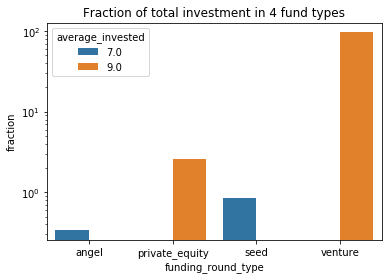

In [99]:

#sns.barplot(data=fund_sum, y="sum_invested", x='fraction')
fraction_plot = sns.barplot(x="funding_round_type", y="fraction", hue="average_invested", data=fund_sum)
fraction_plot.set_title("Fraction of total investment in 4 fund types")
fraction_plot.set(yscale="log")
plt.show()

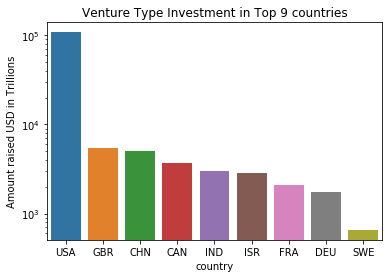

In [100]:
# top 9 country plot

country_top9_df.head()

top_sectors = sns.barplot(x="country", y="Amount_raised_usd_mil", data=country_top9_df, estimator=np.sum)
top_sectors.set_title("Venture Type Investment in Top 9 countries")
top_sectors.set_ylabel("Amount raised USD in Trillions")
top_sectors.set(yscale="log")

plt.show()

In [101]:
master_df_sorted.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,raised_amount_usd_millions,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,10.000000,media
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,8.900000,analytics
21,/organization/1-800-publicrelations-inc-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,01-02-2015,6000000.0,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",Internet Marketing|Media|Public Relations,operating,USA,6.000000,internet marketing
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,5.000000,apps
46,/organization/1001-menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.0,/organization/1001-menus,ZenChef,Local Businesses|Restaurants,operating,FRA,6.602694,local businesses


In [102]:
master_3topsec = master_df_sector[master_df_sector['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

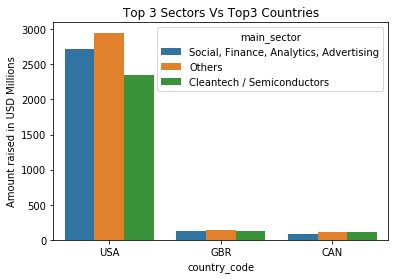

In [103]:
top3_sectors = sns.barplot(x='country_code', y='raised_amount_usd_millions', hue='main_sector', data=master_3topsec, estimator=lambda x:len(x))
top3_sectors.set_title('Top 3 Sectors Vs Top3 Countries')
top3_sectors.set_ylabel('Amount raised in USD Millions')
#top3_sectors.set(yscale="log")
plt.show()